### Sazonalidade Milho

> Análise de sazonalidade do milho através dos preços médios diários apresentados durante um período de 5 anos.

In [ ]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

> Os dados importados do arquivo `CCM-Daily.csv` abaixo, foram obtivos através da ferramenta Meta Trader 5.  
> Valores estes que representam os candles diários do do milho (código `CCM`).

In [ ]:
# carrega dados
df = pd.read_csv("CCM-Daily.csv", header=None, parse_dates=[0], index_col=0)
df.columns = ["open", "high", "low", "close", "tick_volume", "volume"]
df.index.name = "date"

> Histórico de preço real disponibilizado pela plataforma MT5:

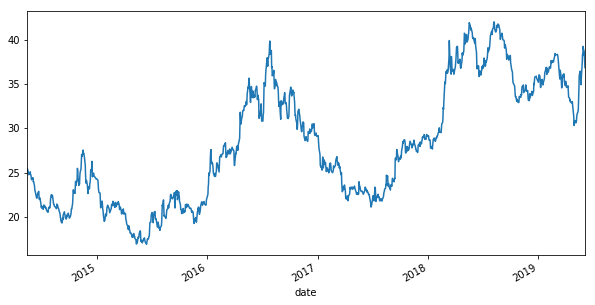

In [6]:
# histórico original
df["close"].plot(figsize=(10, 5))
plt.show()

In [ ]:
# cria dias sequenciais de todo o período do ano (365 dias) evitando gaps
dfD = pd.DataFrame(pd.date_range(start=df.index[0], end=df.index[-1], freq='D'))
dfD.columns = ['date']
dfD = dfD.set_index('date')

In [ ]:
# faz junção com os dados originais
dfD = dfD.join(df["close"])

In [ ]:
# preeche todos os dias vazios com o valor prévio
dfD = dfD.fillna(method='ffill')

> Histórico sem GAPs (os dias dos finais de semana e feriados contém os valores prévios):

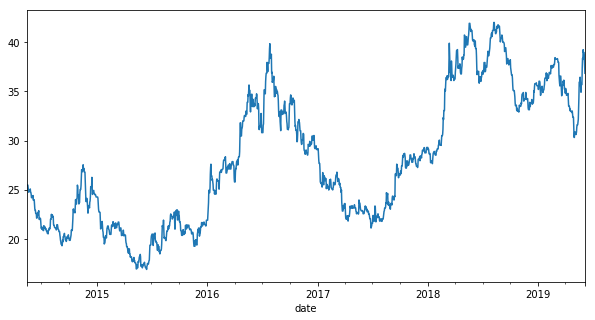

In [7]:
# histórico novo
dfD["close"].plot(figsize=(10, 5))
plt.show()

> Calcula média dos valores por dia do ano.

In [8]:
# calcula média do preço por "dia do ano"
dfD = dfD[["close"]].groupby(dfD.index.dayofyear).mean()

# ignora a última dia do ano bissexto '366' (nem todos os anos tem esta semana)
dfD = dfD[:-1]

# apresenta diferença entre primeiro e último dia (1 vs. 364)
dfD.iloc[[0, -1]]

,close
date,
1,28.026
365,28.026


In [ ]:
# cria nome dos meses
dfR = pd.DataFrame(pd.date_range('2019-1-1', periods=12, freq='M').month)
dfR.columns = ["month"]
dfR['month'] = dfR['month'].apply(lambda x: calendar.month_abbr[x])

> Apresenta gráfico com a média dos valores calcalados:

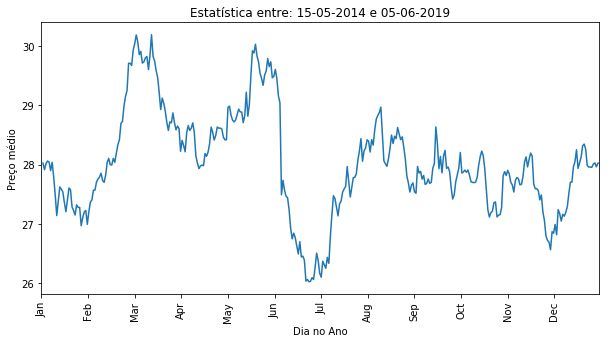

In [10]:
# média dos preços por 'dia do ano' - sazonalidade
dfD["close"].plot(figsize=(10, 5))

plt.title("Estatística entre: " + df.index[0].strftime('%d-%m-%Y') + 
                          " e " + df.index[-1].strftime('%d-%m-%Y'))
plt.xlabel("Dia no Ano")
plt.ylabel("Preço médio")
plt.xticks(np.arange(0, max(dfD.index), step=30.5), dfR['month'], rotation=90)

plt.show()